In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('../../datasets/titanic_numerical.csv')
X = df.select_dtypes(include=np.number).drop(columns=['PassengerId','Survived'])
#X = df.drop(columns=['PassengerId','Survived'])
#cols = ['Pclass', 'Sex', 'Age', 'Fare']
#X = X[cols]
y = df.Survived

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_train_scaled, y_train, epochs=100)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/100


2023-01-31 21:41:16.383972: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-31 21:41:16.384470: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/andre/miniforge3/envs/dev/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2023-01-31 21:41:16.544148: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-31 21:41:16.981256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GP

19/19 [==============================] - 2s 26ms/step - loss: 0.7382 - accuracy: 0.5705 - precision: 0.3333 - recall: 0.1532
Epoch 2/100
19/19 [==============================] - 0s 11ms/step - loss: 0.6667 - accuracy: 0.6275 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6694 - accuracy: 0.6275 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.6647 - accuracy: 0.6275 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6610 - accuracy: 0.6275 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6625 - accuracy: 0.6275 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6621 - accuracy: 0.6275 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch

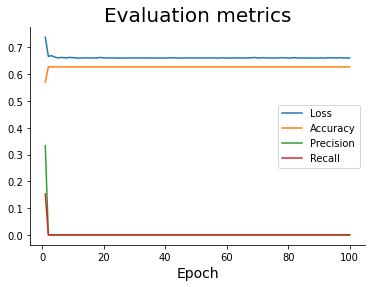

In [11]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();